<a href="https://colab.research.google.com/github/kamakshisoni/Data-Science-projects/blob/master/defaulter_data_final_new_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie,axis,show
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import sklearn
from matplotlib import pyplot
print(sklearn.__version__)

0.22.2.post1


In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Reading Dataset

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving hmeq1.csv to hmeq1 (1).csv


In [ ]:
import io
df= pd.read_csv(io.BytesIO(uploaded['hmeq1.csv']))

### Missing Values Plot

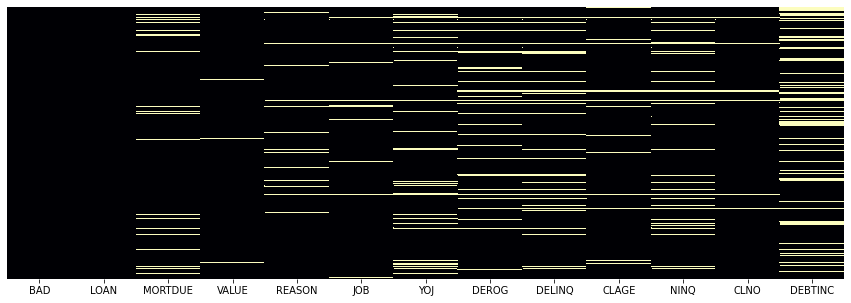

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='magma')
# all the light colour represent the amount of missing value in each column

### Correlation Plot

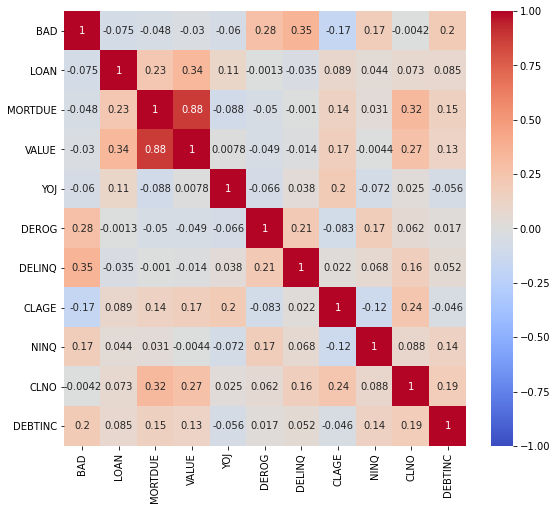

In [ ]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

## Data Preprocessing:-

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


### Data Visualization

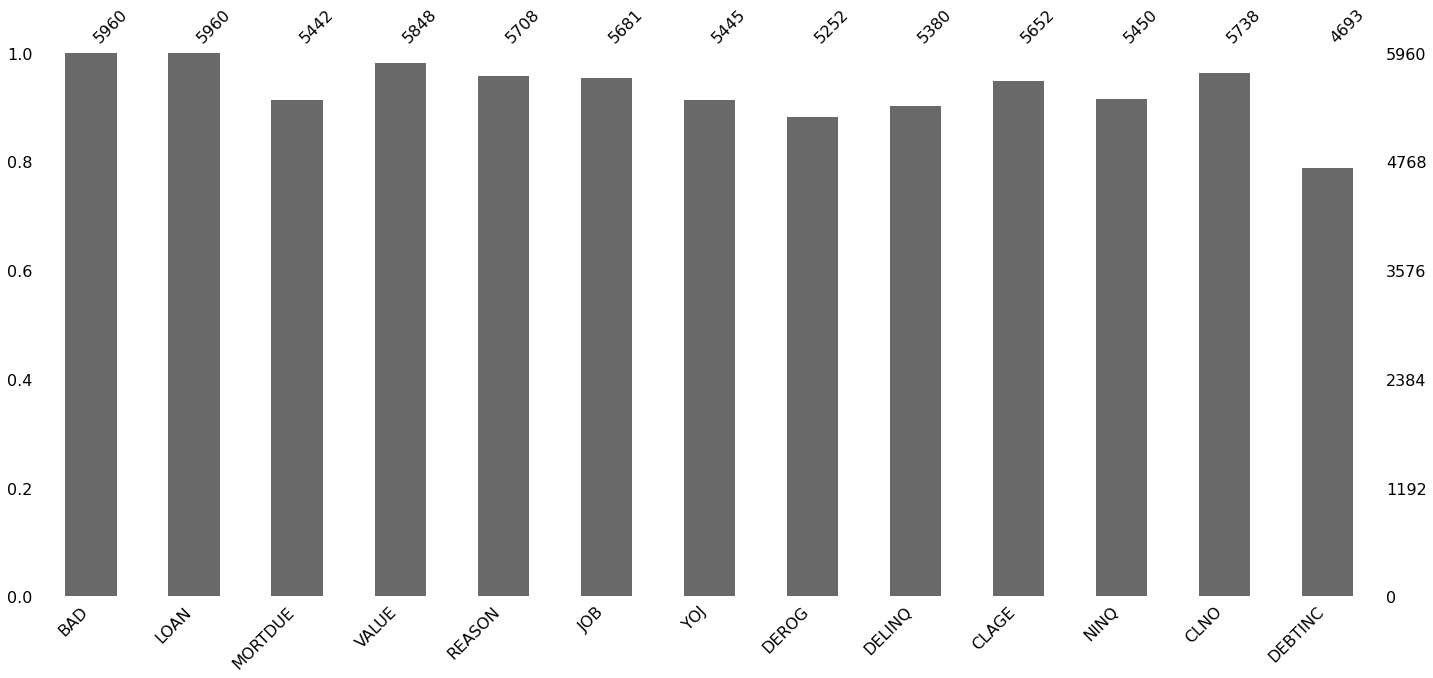

In [ ]:
#This bar chart gives you an idea about how many missing values are there in each column.
import missingno as msno
msno.bar(df)

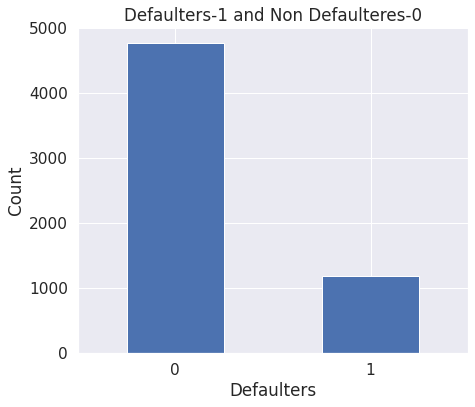

In [ ]:
sns.set(font_scale=1.4)
df['BAD'].value_counts().plot(kind='bar',figsize=(7,6),rot=0)
plt.xlabel("Defaulters")
plt.ylabel("Count")
plt.title("Defaulters-1 and Non Defaulteres-0")
plt.show()
# dataset is unbalanced

In [ ]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

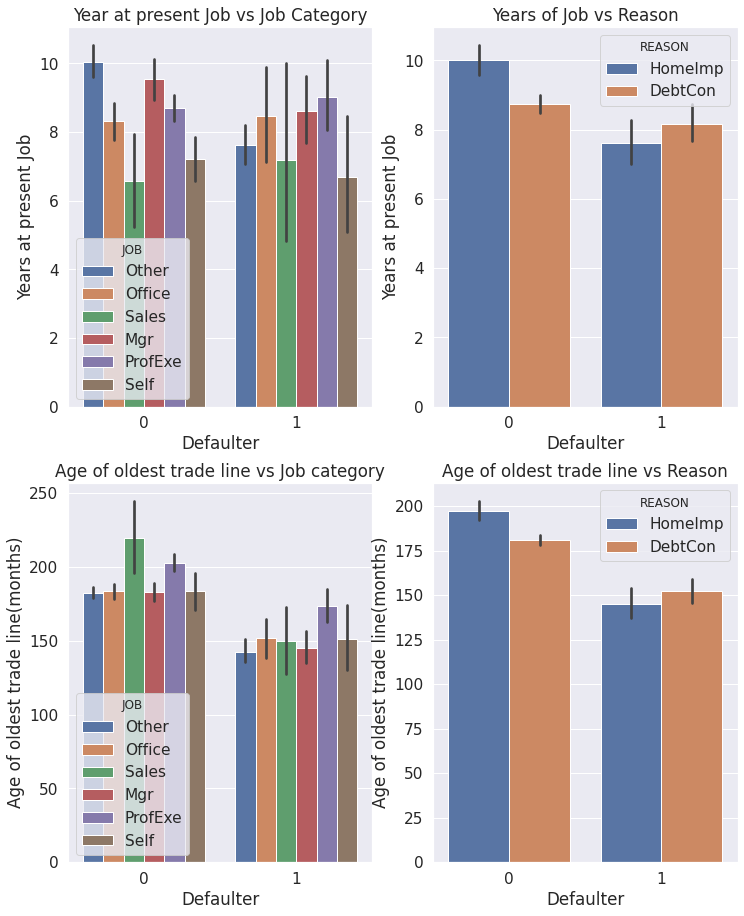

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(12,4))
plt.subplot(2,2,1)
sns.barplot(x='BAD',y='YOJ',hue='JOB',data=df)
plt.title("Year at present Job vs Job Category")
plt.xlabel("Defaulter")
plt.ylabel("Years at present Job")
plt.subplot(2,2,2)
sns.barplot(x='BAD',y='YOJ',hue='REASON',data=df)
plt.title("Years of Job vs Reason")
plt.xlabel("Defaulter")
plt.ylabel("Years at present Job")
plt.subplot(2,2,3)
sns.barplot(x='BAD',y='CLAGE',hue='JOB',data=df)
plt.title("Age of oldest trade line vs Job category")
plt.xlabel("Defaulter")
plt.ylabel("Age of oldest trade line(months)")
plt.subplot(2,2,4)
sns.barplot(x='BAD',y='CLAGE',hue='REASON',data=df)
plt.title("Age of oldest trade line vs Reason")
plt.xlabel("Defaulter")
plt.ylabel("Age of oldest trade line(months)")
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

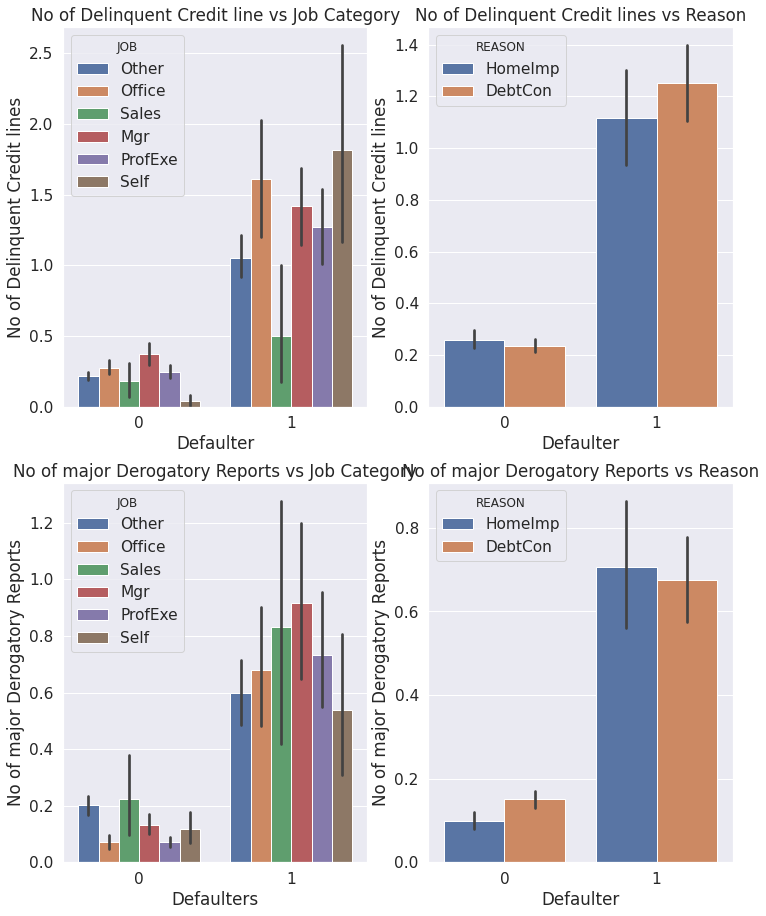

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(12,4))
plt.subplot(2,2,1)
sns.barplot(x='BAD',y='DELINQ',hue='JOB',data=df)
plt.title("No of Delinquent Credit line vs Job Category")
plt.xlabel("Defaulter")
plt.ylabel("No of Delinquent Credit lines")
plt.subplot(2,2,2)
sns.barplot(x='BAD',y='DELINQ',hue='REASON',data=df)
plt.title("No of Delinquent Credit lines vs Reason")
plt.xlabel("Defaulter")
plt.ylabel("No of Delinquent Credit lines")
plt.subplot(2,2,3)
sns.barplot(x='BAD',y='DEROG',hue='JOB',data=df)
plt.title("No of major Derogatory Reports vs Job Category")
plt.xlabel("Defaulters")
plt.ylabel("No of major Derogatory Reports")
plt.subplot(2,2,4)
sns.barplot(x='BAD',y='DEROG',hue='REASON',data=df)
plt.title("No of major Derogatory Reports vs Reason")
plt.xlabel("Defaulter")
plt.ylabel("No of major Derogatory Reports")
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

In [ ]:
# 'No of Derogatory Reports' and 'No of Delinquent Credit Lines' both are majorly affecting the Dataset .
#  As No of Delinquent Credit Lines Increases in  features 'Job Category' and 'Reason', Default rate is also increasing
# with the increase of 'Derogatory reports' in features 'Job' and 'Reason' , Default rate is also increasing.

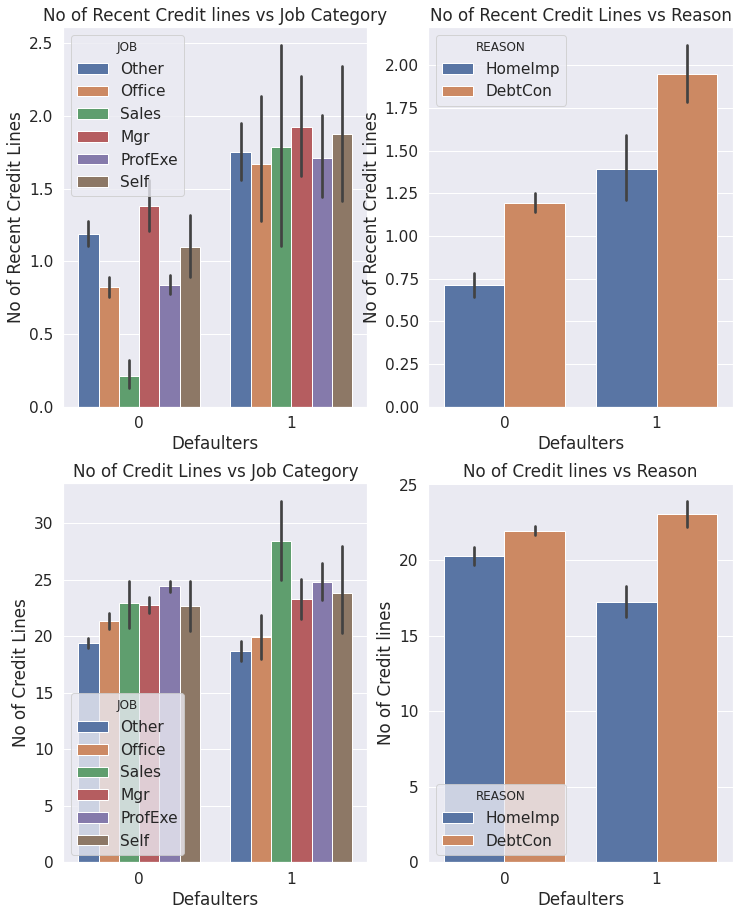

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(12,4))
plt.subplot(2,2,1)
sns.barplot(x='BAD',y='NINQ',hue='JOB',data=df)
plt.title("No of Recent Credit lines vs Job Category")
plt.xlabel("Defaulters")
plt.ylabel("No of Recent Credit Lines")
plt.subplot(2,2,2)
sns.barplot(x='BAD',y='NINQ',hue='REASON',data=df)
plt.title("No of Recent Credit Lines vs Reason")
plt.xlabel("Defaulters")
plt.ylabel("No of Recent Credit Lines")
plt.subplot(2,2,3)
sns.barplot(x='BAD',y='CLNO',hue='JOB',data=df)
plt.title("No of Credit Lines vs Job Category")
plt.xlabel("Defaulters")
plt.ylabel("No of Credit Lines")
plt.subplot(2,2,4)
sns.barplot(x='BAD',y='CLNO',hue='REASON',data=df)
plt.title("No of Credit lines vs Reason")
plt.xlabel("Defaulters")
plt.ylabel("No of Credit lines")
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

In [ ]:
# With the increase of 'No of recent credit lines' in Features 'Job' and 'Reason' default rate is increasing.
# No of Credt Lines is affecting Sales in 'Job Category'.

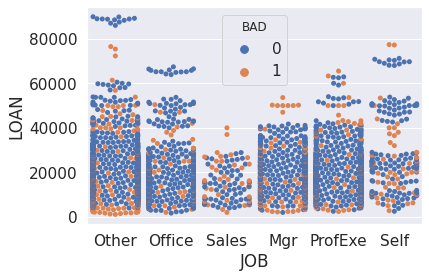

In [ ]:
sns.swarmplot(x="JOB", y="LOAN", hue="BAD", data=df);
plt.show()

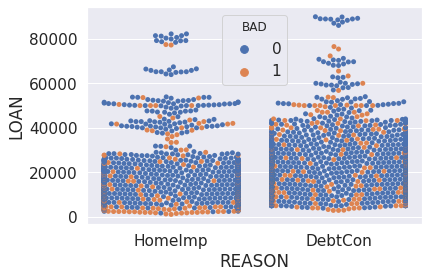

In [ ]:
sns.swarmplot(x="REASON", y="LOAN", hue="BAD", data=df);
plt.show()

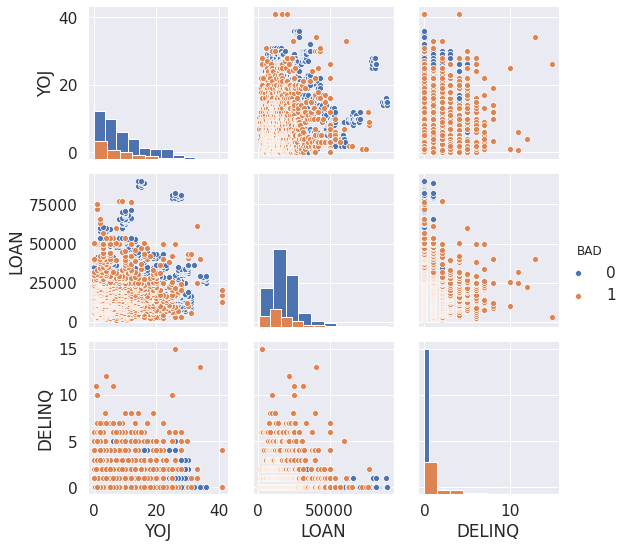

In [ ]:
cont_col= ['BAD','YOJ', 'LOAN','DELINQ']
sns.pairplot(df[cont_col],  diag_kind = "hist" , hue = 'BAD' )
plt.show()

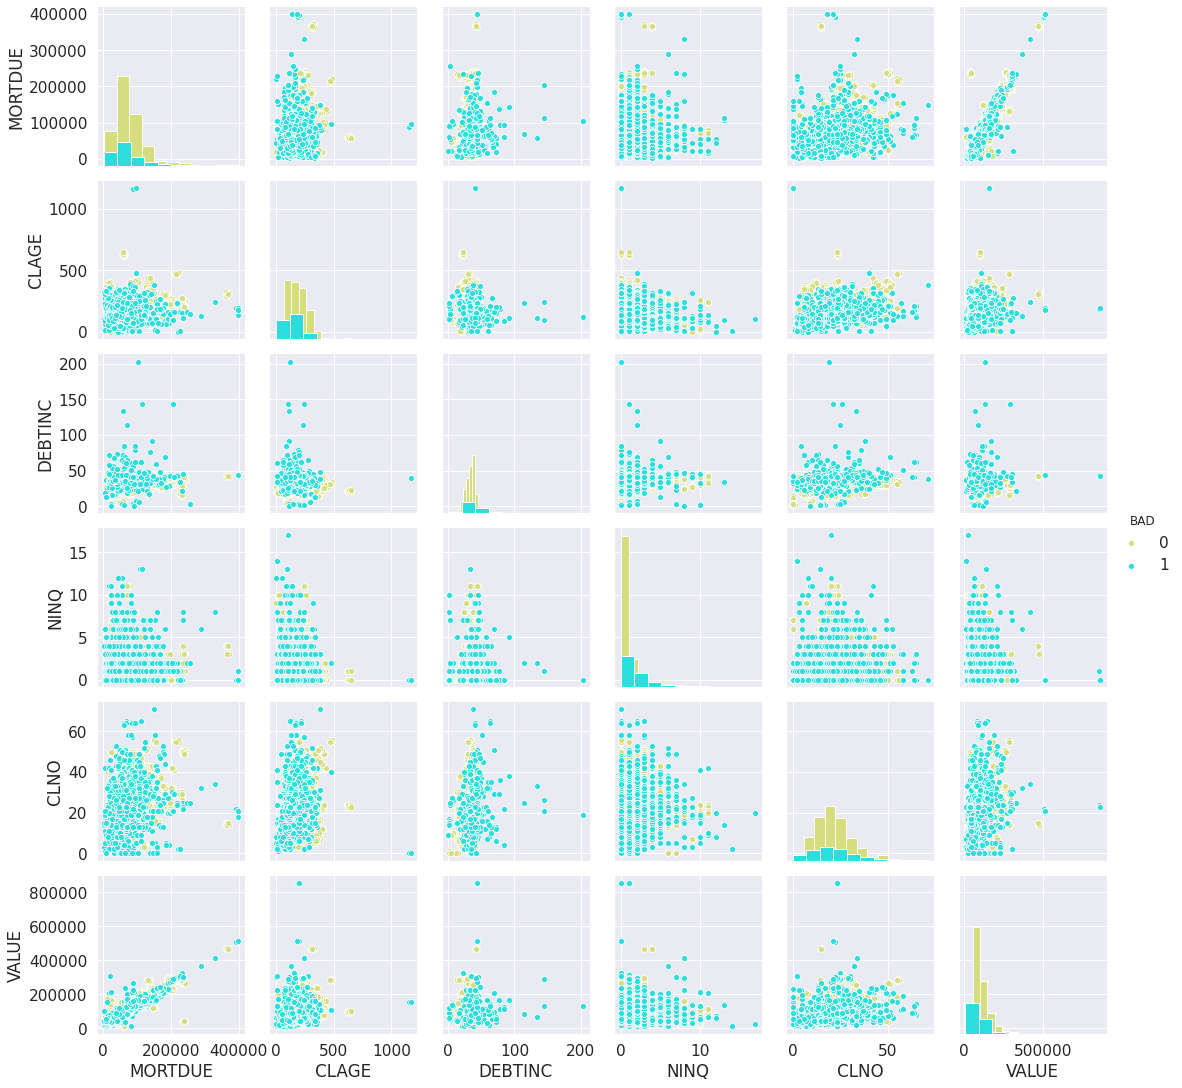

In [ ]:
cont_col= ['BAD','MORTDUE','CLAGE', 'DEBTINC','NINQ','CLNO','VALUE']
sns.pairplot(df[cont_col], diag_kind = "hist" , hue = 'BAD',palette='rainbow_r' )
plt.show()

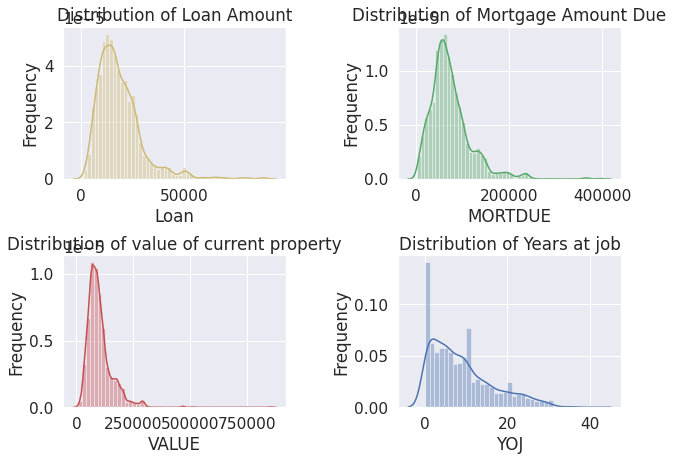

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(df.LOAN.dropna(),color='y')
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan")
plt.ylabel("Frequency")
plt.subplot(2,2,2)
sns.distplot(df.MORTDUE.dropna(),color='g')
plt.title("Distribution of Mortgage Amount Due")
plt.xlabel("MORTDUE")
plt.ylabel("Frequency")
plt.subplot(2,2,3)
sns.distplot(df.VALUE.dropna(),color='r')
plt.title("Distribution of value of current property")
plt.xlabel("VALUE")
plt.ylabel("Frequency")
plt.subplot(2,2,4)
sns.distplot(df.YOJ.dropna(),color='b')
plt.title("Distribution of Years at job")
plt.xlabel("YOJ")
plt.ylabel("Frequency")
plt.subplots_adjust(hspace=.5,wspace=.5)
plt.show()

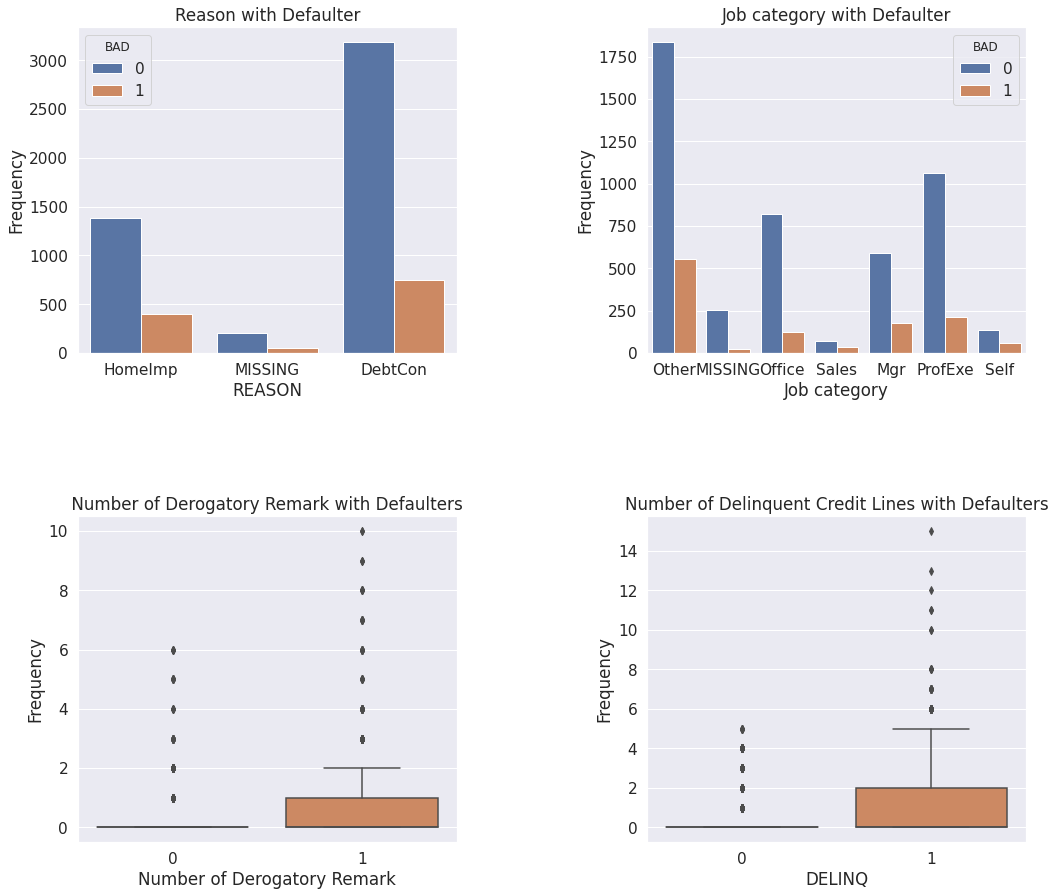

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(17,15))
plt.subplot(2,2,1)
x=df.REASON.copy()
x[pd.isnull(x)==True]='MISSING'
sns.countplot(x,hue=df.BAD)
plt.title("Reason with Defaulter")
plt.xlabel("REASON")
plt.ylabel("Frequency")
plt.subplot(2,2,2)
x=df.JOB.copy()
x[pd.isnull(x)==True]='MISSING'
sns.countplot(x,hue=df.BAD)
plt.title("Job category with Defaulter")
plt.xlabel("Job category")
plt.ylabel("Frequency")
plt.subplot(2,2,3)
sns.boxplot(y=df.DEROG,x=df.BAD)
plt.title(" Number of Derogatory Remark with Defaulters ")
plt.xlabel("Number of Derogatory Remark")
plt.ylabel("Frequency")
plt.subplot(2,2,4)
sns.boxplot(y=df.DELINQ,x=df.BAD)
plt.title("Number of Delinquent Credit Lines with Defaulters")
plt.xlabel("DELINQ")
plt.ylabel("Frequency")
plt.subplots_adjust(hspace=.5,wspace=.5)
plt.show()

In [ ]:
#TO COUNT EACH VALUES IN THE COLUMN
print("Reason Count:\n",df['REASON'].value_counts())
print("\nJob count:\n",df['JOB'].value_counts())

Reason Count:
 DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

Job count:
 Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


### BoxPlots

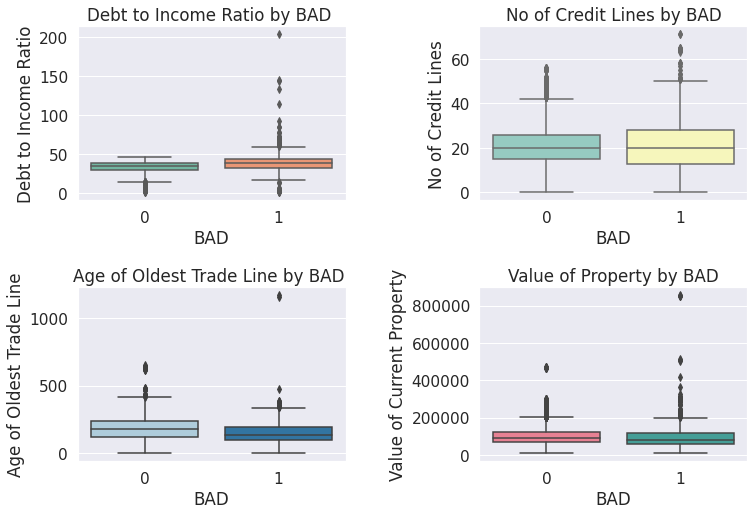

In [ ]:

f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(y=df.DEBTINC,x=df.BAD,palette="Set2")
plt.title("Debt to Income Ratio by BAD ")
plt.xlabel("BAD")
plt.ylabel("Debt to Income Ratio")
plt.subplot(2,2,2)
sns.boxplot(y=df.CLNO,x=df.BAD,palette="Set3")
plt.title("No of Credit Lines by BAD")
plt.xlabel("BAD")
plt.ylabel("No of Credit Lines")
plt.subplot(2,2,3)
sns.boxplot(y=df.CLAGE,x=df.BAD,palette='Paired')
plt.title("Age of Oldest Trade Line by BAD ")
plt.xlabel("BAD")
plt.ylabel("Age of Oldest Trade Line")
plt.subplot(2,2,4)
sns.boxplot(y=df.VALUE,x=df.BAD,palette="husl")
plt.title("Value of Property by BAD")
plt.xlabel("BAD")
plt.ylabel("Value of Current Property")
plt.subplots_adjust(hspace=.5,wspace=.5)
plt.show()

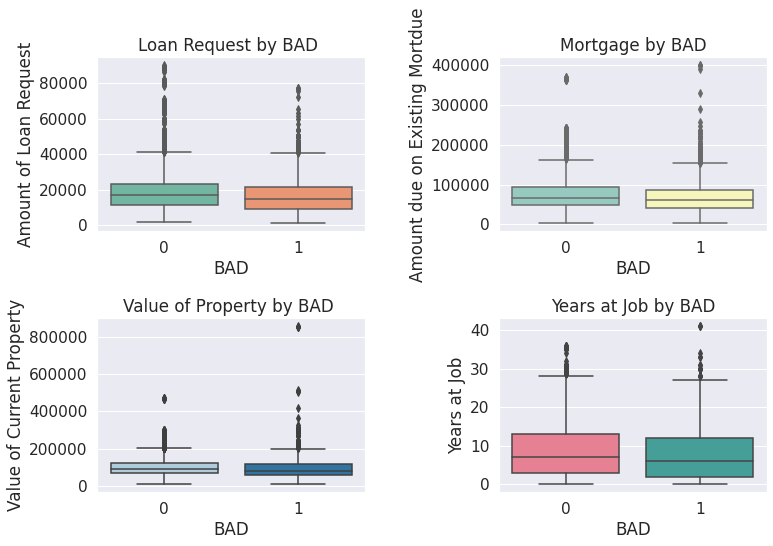

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(y=df.LOAN,x=df.BAD,palette="Set2")
plt.title("Loan Request by BAD ")
plt.xlabel("BAD")
plt.ylabel("Amount of Loan Request")
plt.subplot(2,2,2)
sns.boxplot(y=df.MORTDUE,x=df.BAD,palette="Set3")
plt.title("Mortgage by BAD")
plt.xlabel("BAD")
plt.ylabel("Amount due on Existing Mortdue")
plt.subplot(2,2,3)
sns.boxplot(y=df.VALUE,x=df.BAD,palette='Paired')
plt.title("Value of Property by BAD ")
plt.xlabel("BAD")
plt.ylabel("Value of Current Property")
plt.subplot(2,2,4)
sns.boxplot(y=df.YOJ,x=df.BAD,palette="husl")
plt.title("Years at Job by BAD")
plt.xlabel("BAD")
plt.ylabel("Years at Job")
plt.subplots_adjust(hspace=.5,wspace=.5)
plt.show()

In [ ]:
# In some cases we need to remove Outliers without affecting much data

### Histogram of some important Variables

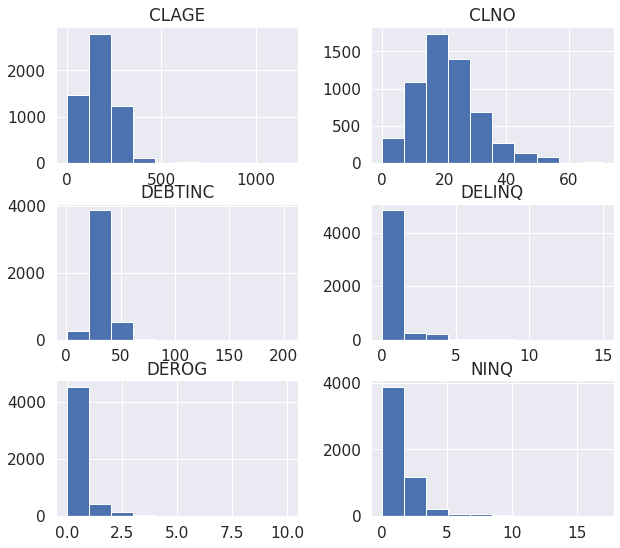

In [ ]:
viz = df[['DEROG','DELINQ' ,'CLAGE','NINQ','CLNO','DEBTINC']]
viz.hist(figsize=(10,9))
plt.show()

### Missing Values Treatment

In [ ]:
#Treating 'DEBTINC' missing values with the mean of other Feature ie. 'REASON'

In [ ]:
df1=df.copy()
#TO FILL MISSING CATEGORICAL VALUES WITH IMPUTER
print(np.mean(df1.loc[df1.REASON == 'HomeImp','DEBTINC']))
print(np.mean(df1.loc[df1.REASON == 'DebtCon','DEBTINC']))
print(np.mean(df1.loc[pd.isnull(df1.REASON) == True,'DEBTINC']))


33.28006315745359
34.30879626604945
28.830722200020382


In [ ]:
df1.loc[(df1.REASON == 'HomeImp') & (pd.isnull(df1.DEBTINC) == True),'DEBTINC'] = np.mean(df1.loc[df1.REASON == 'HomeImp','DEBTINC'])
df1.loc[(df1.REASON == 'DebtCon') & (pd.isnull(df1.DEBTINC) == True),'DEBTINC'] = np.mean(df1.loc[df1.REASON == 'DebtCon','DEBTINC'])
df1.loc[(pd.isnull(df1.REASON) == True) & (pd.isnull(df1.DEBTINC) == True),'DEBTINC'] = np.mean(df1.loc[pd.isnull(df1.REASON) == True,'DEBTINC'])


In [ ]:
# In the Case of 'Job category' and 'Reason' with are just replacing null values with missing and others respectively.

In [ ]:
df1.loc[pd.isnull(df1.JOB)==True,'JOB']='Missing'
df1.loc[pd.isnull(df1.REASON)==True,'REASON']='Other'

In [ ]:
# here for the Feature 'DELINQ' using Mode

In [ ]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp.fit(df1.iloc[:,8:9])
df1.loc[:,8:9]=imp.transform(df1.iloc[:,8:9])


In [ ]:
# Now Droping NAs

In [ ]:

df1=df1.dropna()

In [ ]:
df1.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [ ]:
### Creating Dummy variables

In [ ]:
#to convert categorical into numerical
dum_df = pd.get_dummies(df1, columns=["REASON","JOB"] )
dum_df.columns
df2=dum_df.drop(['REASON_Other','JOB_Mgr'],1)


In [ ]:
X=df2.iloc[:,df2.columns!='BAD']
Y=df2.iloc[:,0]

### Feature Scaling

In [ ]:
#NORMALIZATION
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.54057297, -1.07366485, -1.20588908,  0.19051072, -0.28692168,
        -0.37529976, -0.99936181, -0.09702025, -1.35670365, -0.10702673,
        -1.48673287,  1.56575474, -0.14679832, -0.44226652,  1.27204416,
        -0.57976886, -0.13347792, -0.17810195],
       [-1.52297385, -0.08775534, -0.66916383, -0.27027698, -0.28692168,
         1.5414174 , -0.66860347, -0.7016667 , -0.83536255, -0.10702673,
        -1.48673287,  1.56575474, -0.14679832, -0.44226652,  1.27204416,
        -0.57976886, -0.13347792, -0.17810195],
       [-1.50537472, -1.3494063 , -1.61380026, -0.66523786, -0.28692168,
        -0.37529976, -0.33583809, -0.09702025, -1.25243543, -0.10702673,
        -1.48673287,  1.56575474, -0.14679832, -0.44226652,  1.27204416,
        -0.57976886, -0.13347792, -0.17810195],
       [-1.4877756 ,  0.53125743,  0.12747346, -0.79689149, -0.28692168,
        -0.37529976, -1.01180539, -0.7016667 , -0.83536255, -0.10702673,
        -1.48673287,  1.56575474, -0.14679832,  2.261

In [ ]:
#splitting the data into trainng and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print("shape of X_train,Y_train:",X_train.shape,Y_train.shape)
print("shape of X_test,Y_test:",X_test.shape,Y_test.shape)

shape of X_train,Y_train: (3564, 18) (3564,)
shape of X_test,Y_test: (892, 18) (892,)


## Model Building:-

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

## Fitting Models to Data
### Random Forest

In [ ]:
# Applying random forest
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

acc1=metrics.accuracy_score(Y_test, Y_pred)
f1_score1=f1_score(Y_test,Y_pred,average='macro')
jacc1=jaccard_similarity_score(Y_test, Y_pred)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9260089686098655
Precision: 0.9854014598540146
Recall: 0.678391959798995


In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_train,classifier.predict(X_train)))
print("Accuracy on test set:",metrics.accuracy_score(Y_test,Y_pred))

Accuracy on train set: 1.0
Accuracy on test set: 0.9260089686098655


### eXtreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
model2= XGBClassifier()
model2.fit(X_train,Y_train)

# Predicting the Test set results
Y_pred2 = model2.predict(X_test)

acc3=metrics.accuracy_score(Y_test, Y_pred2)
f1_score3=f1_score(Y_test, Y_pred2,average='macro')
jacc3=jaccard_similarity_score(Y_test, Y_pred2)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred2))
print("Precision:",metrics.precision_score(Y_test, Y_pred2))
print("Recall:",metrics.recall_score(Y_test, Y_pred2))

Accuracy: 0.899103139013453
Precision: 0.936
Recall: 0.5879396984924623


In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_train,model2.predict(X_train)))
print("Accuracy on test set:",metrics.accuracy_score(Y_test,Y_pred2))

Accuracy on train set: 0.9194725028058361
Accuracy on test set: 0.899103139013453


### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_2 = KNeighborsClassifier()
knn_2.fit(X_train, Y_train)

# Predicting the Test set results
y_pred_1 = knn_2.predict(X_test)

acc4=metrics.accuracy_score(Y_test, y_pred_1)
f1_score4=f1_score(Y_test, y_pred_1,average='macro')
jacc4=jaccard_similarity_score(Y_test, y_pred_1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_1))
print("Precision:",metrics.precision_score(Y_test, y_pred_1))
print("Recall:",metrics.recall_score(Y_test, y_pred_1))

Accuracy: 0.8688340807174888
Precision: 0.9767441860465116
Recall: 0.4221105527638191


In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_train,knn_2.predict(X_train)))
print("Accuracy on test set:",metrics.accuracy_score(Y_test,y_pred_1))

Accuracy on train set: 0.9231200897867564
Accuracy on test set: 0.8688340807174888


### Support Vector Machine

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)

yhat = clf.predict(X_test)

acc5=metrics.accuracy_score(Y_test, yhat)
f1_score5=f1_score(Y_test, yhat,average='macro')
jacc5=jaccard_similarity_score(Y_test, yhat)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, yhat))
print("Precision:",metrics.precision_score(Y_test, yhat))
print("Recall:",metrics.recall_score(Y_test, yhat))


Accuracy: 0.8778026905829597
Precision: 0.9891304347826086
Recall: 0.457286432160804


In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_train,clf.predict(X_train)))
print("Accuracy on test set:",metrics.accuracy_score(Y_test,yhat))

Accuracy on train set: 0.9031986531986532
Accuracy on test set: 0.8778026905829597


### Model Evaluation

In [ ]:
models = pd.DataFrame({
    'Model': ['Random forest','xgboost','KNN','SVM'],
    'Accuracy Score': [acc1,acc3,acc4,acc5],
    'F1-score' : [f1_score1,f1_score3,f1_score4,f1_score5],
    'Jaccard Similarity score' : [jacc1,jacc3,jacc4,jacc5]
})

In [ ]:
models

,Model,Accuracy Score,F1-score,Jaccard Similarity score
0,Random forest,0.926009,0.878996,0.926009
1,xgboost,0.899103,0.830289,0.899103
2,KNN,0.868834,0.755711,0.868834
3,SVM,0.877803,0.776211,0.877803


## Outliers Treatment

In [ ]:
df1_new=df1.copy()

Text(0, 0.5, 'Frequency')

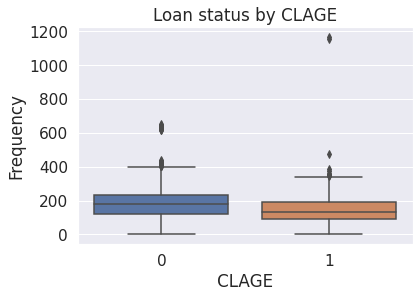

In [ ]:
sns.boxplot(y=df1_new.CLAGE,x=df1_new.BAD)
plt.title("Loan status by CLAGE")
plt.xlabel("CLAGE")
plt.ylabel("Frequency")

In [ ]:
# Checking IQR , Q1 and Q3 for feature CLAGE

In [ ]:
IQR_1 = df1.CLAGE.quantile(0.75) - df1.CLAGE.quantile(0.25)

Lower_fence_1 = df1.CLAGE.quantile(0.25) - (IQR_1 * 3)
Upper_fence_1 = df1.CLAGE.quantile(0.75) + (IQR_1 * 3)

Upper_fence_1, Lower_fence_1, IQR_1

(557.707394325, -214.83054754999995, 110.362563125)

In [ ]:
print(np.where(df1.CLAGE > 650))

(array([2334, 2810]),)


In [ ]:
# Capping the data points  which are greater than or equals to 650

In [ ]:
df1.loc[df1.CLAGE>=650,"CLAGE"]=650

Text(0, 0.5, 'Frequency')

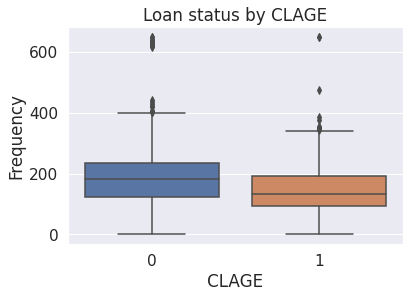

In [ ]:
sns.boxplot(y=df1.CLAGE,x=df1.BAD)
plt.title("Loan status by CLAGE")
plt.xlabel("CLAGE")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

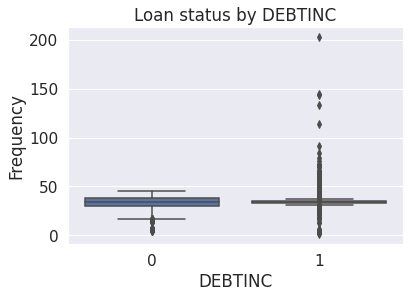

In [ ]:
sns.boxplot(y=df1_new.DEBTINC,x=df1_new.BAD)
plt.title("Loan status by DEBTINC")
plt.xlabel("DEBTINC")
plt.ylabel("Frequency")

In [ ]:
# Checking IQR, Q1 and Q3 for DEBTINC

In [ ]:
IQR2 = df1.DEBTINC.quantile(0.75) - df1.DEBTINC.quantile(0.25)

Lower_fence_2 = df1.DEBTINC.quantile(0.25) - (IQR2 * 3)
Upper_fence_2 = df1.DEBTINC.quantile(0.75) + (IQR2 * 3)

Upper_fence_2, Lower_fence_2, IQR2

(59.11132290249998, 9.79949983500002, 7.0445461524999935)

In [ ]:
print(np.where(df1.DEBTINC>100))

(array([2970, 3315, 3352, 4215, 4410]),)


In [ ]:
#THERE ARE LOTS OF DATA NEAR 60 SO WE CAN GO FOR 100
df1.loc[df1.DEBTINC>=100,"DEBTINC"]=100

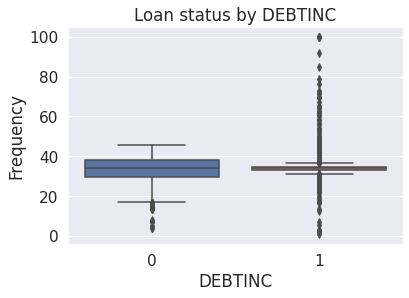

In [ ]:
sns.boxplot(y=df1.DEBTINC,x=df1.BAD)
plt.title("Loan status by DEBTINC")
plt.xlabel("DEBTINC")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Frequency')

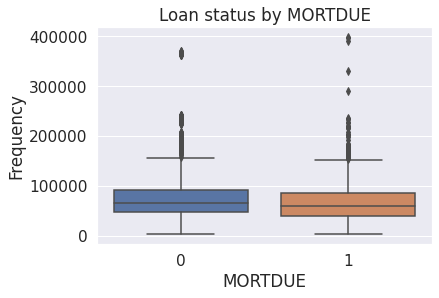

In [ ]:
sns.boxplot(y=df1_new.MORTDUE,x=df1_new.BAD)
plt.title("Loan status by MORTDUE")
plt.xlabel("MORTDUE")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

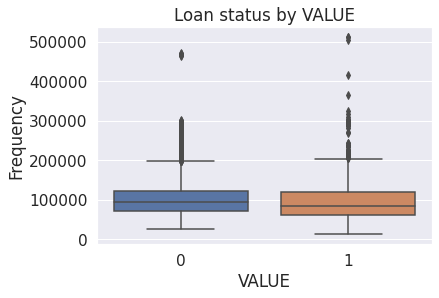

In [ ]:
sns.boxplot(y=df1_new.VALUE,x=df1_new.BAD)
plt.title("Loan status by VALUE")
plt.xlabel("VALUE")
plt.ylabel("Frequency")

In [ ]:
# Checking IQR, Q1 and Q3 for VALUE

In [ ]:
IQR4 = df1.VALUE.quantile(0.75) - df1.VALUE.quantile(0.25)

Lower_fence4 = df1.VALUE.quantile(0.25) - (IQR4 * 3)
Upper_fence4 = df1.VALUE.quantile(0.75) + (IQR4 * 3)

Upper_fence4, Lower_fence4, IQR4

(278912.75, -88251.25, 52452.0)

In [ ]:
print(np.where(df1.VALUE>=470000))

(array([4179, 4208, 4242, 4278]),)


In [ ]:
# Capping the values which are greater than and equals to 470000

In [ ]:
df1.loc[df1.VALUE>=470000,'VALUE']=470000


Text(0, 0.5, 'Frequency')

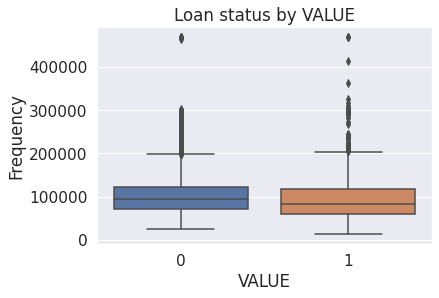

In [ ]:
sns.boxplot(y=df1.VALUE,x=df1.BAD)
plt.title("Loan status by VALUE")
plt.xlabel("VALUE")
plt.ylabel("Frequency")

In [ ]:
#to convert categorical into numerical
dum_df1 = pd.get_dummies(df1, columns=["REASON","JOB"] )
dum_df1.columns
df3=dum_df.drop(['REASON_Other','JOB_Mgr'],1)


In [ ]:
X1=df3.iloc[:,df3.columns!='BAD'].values
Y1=df3.iloc[:,0].values

In [ ]:
#splitting the data into trainng and testing data
from sklearn.model_selection import train_test_split
X_tr,X_te,Y_tr,Y_te=train_test_split(X1,Y1,test_size=0.2,random_state=1)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_te = sc.transform(X_te)


In [ ]:
print("shape of X_train,Y_train:",X_tr.shape,Y_tr.shape)
print("shape of X_test,Y_test:",X_te.shape,Y_te.shape)

shape of X_train,Y_train: (3564, 18) (3564,)
shape of X_test,Y_test: (892, 18) (892,)


### Model building After Outlier treatment

In [ ]:
# Applying random forest
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(random_state=0)
classifier1.fit(X_tr, Y_tr)

# Predicting the Test set results
Y_pred1 = classifier1.predict(X_te)

acc6=metrics.accuracy_score(Y_te, Y_pred1)
f1_score6=f1_score(Y_te,Y_pred1,average='macro')
jacc6=jaccard_similarity_score(Y_te, Y_pred1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_te, Y_pred1))
print("Precision:",metrics.precision_score(Y_te, Y_pred1))
print("Recall:",metrics.recall_score(Y_te, Y_pred1))

Accuracy: 0.92152466367713
Precision: 0.928
Recall: 0.655367231638418


In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_tr,classifier1.predict(X_tr)))
print("Accuracy on test set:",metrics.accuracy_score(Y_te,Y_pred1))

Accuracy on train set: 1.0
Accuracy on test set: 0.92152466367713


In [ ]:
from xgboost import XGBClassifier
model3= XGBClassifier()
model3.fit(X_tr,Y_tr)

# Predicting the Test set results
Y_pred3 = model3.predict(X_te)

acc8=metrics.accuracy_score(Y_te, Y_pred3)
f1_score8=f1_score(Y_te, Y_pred3,average='macro')
jacc8=jaccard_similarity_score(Y_te, Y_pred3)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_te, Y_pred3))
print("Precision:",metrics.precision_score(Y_te, Y_pred3))
print("Recall:",metrics.recall_score(Y_te, Y_pred3))

Accuracy: 0.8934977578475336
Precision: 0.8253968253968254
Recall: 0.5875706214689266


In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_tr,model3.predict(X_tr)))
print("Accuracy on test set:",metrics.accuracy_score(Y_te,Y_pred3))

Accuracy on train set: 0.9158249158249159
Accuracy on test set: 0.8934977578475336


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier()
knn_3.fit(X_tr, Y_tr)

# Predicting the Test set results
y_pred_2 = knn_3.predict(X_te)

acc9=metrics.accuracy_score(Y_te, y_pred_2)
f1_score9=f1_score(Y_te, y_pred_2,average='macro')
jacc9=jaccard_similarity_score(Y_te, y_pred_2)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_te, y_pred_2))
print("Precision:",metrics.precision_score(Y_te, y_pred_2))
print("Recall:",metrics.recall_score(Y_te, y_pred_2))

Accuracy: 0.8946188340807175
Precision: 1.0
Recall: 0.4689265536723164


In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_tr,knn_3.predict(X_tr)))
print("Accuracy on test set:",metrics.accuracy_score(Y_te,y_pred_2))

Accuracy on train set: 0.9250841750841751
Accuracy on test set: 0.8946188340807175


In [ ]:
from sklearn import svm
clf1 = svm.SVC(kernel='rbf')
clf1.fit(X_tr, Y_tr)

yhat1 = clf1.predict(X_te)

acc10=metrics.accuracy_score(Y_te, yhat1)
f1_score10=f1_score(Y_te, yhat1,average='macro')
jacc10=jaccard_similarity_score(Y_te, yhat1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_te, yhat1))
print("Precision:",metrics.precision_score(Y_te, yhat1))
print("Recall:",metrics.recall_score(Y_te, yhat1))

Accuracy: 0.8856502242152466
Precision: 0.9629629629629629
Recall: 0.4406779661016949


In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_tr,clf1.predict(X_tr)))
print("Accuracy on test set:",metrics.accuracy_score(Y_te,yhat1))

Accuracy on train set: 0.9020763187429854
Accuracy on test set: 0.8856502242152466


### Model Evaluation After treating Outliers

In [ ]:
report = pd.DataFrame({
    'Model': ['Random forest','xgboost','KNN','SVM','Random forest','xgboost','KNN','SVM'],
    'Otlier Treatment':['None','None','None','None','Applied','Applied','Applied','Applied'],
    'Accuracy Score': [acc1,acc3,acc4,acc5,acc6,acc8,acc9,acc10],
    'F1-score' : [f1_score1,f1_score3,f1_score4,f1_score5,f1_score6,f1_score8,f1_score9,f1_score10],
    'Jaccard Similarity score' : [jacc1,jacc3,jacc4,jacc5,jacc6,jacc8,jacc9,jacc10]
})
report

,Model,Otlier Treatment,Accuracy Score,F1-score,Jaccard Similarity score
0,Random forest,None,0.926009,0.878996,0.926009
1,xgboost,None,0.899103,0.830289,0.899103
2,KNN,None,0.868834,0.755711,0.868834
3,SVM,None,0.877803,0.776211,0.877803
4,Random forest,Applied,0.921525,0.860489,0.921525
5,xgboost,Applied,0.893498,0.811161,0.893498
6,KNN,Applied,0.894619,0.788391,0.894619
7,SVM,Applied,0.885650,0.768905,0.885650


#### we have increased accuracy  but need to improve F1-score

## GridSearch

### Gridsearch with XGBOOST

In [ ]:
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
n_estimators = [ 400, 500,600,700]
learning_rate = [0.0001, 0.001, 0.01, 0.1]


param_grid = dict( n_estimators=n_estimators,learning_rate=learning_rate)


grid_search = GridSearchCV(model, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search.fit(X_tr, Y_tr)

# view the complete results
print("best score:",grid_search.best_score_)
print("best parameter:",grid_search.best_params_)


best score: 0.7001207243460765
best parameter: {'learning_rate': 0.1, 'n_estimators': 700}


In [ ]:
max_depth=list(range(3,10))
min_child_weight= list(range(1,6))
param_grid1 = dict(max_depth=max_depth,
                 min_child_weight=min_child_weight)


grid_search1 = GridSearchCV(model, param_grid1, scoring="recall", n_jobs=-1, cv=10)
grid_result1 = grid_search1.fit(X_tr, Y_tr)

# view the complete results
print("best score:",grid_search1.best_score_)
print("best parameter:",grid_search1.best_params_)

best score: 0.7157344064386317
best parameter: {'max_depth': 8, 'min_child_weight': 1}


In [ ]:
subsample= [0.5,0.55,0.6,0.65,0.7,0.75,0.8]
colsample_bytree=[0.6,0.65,0.7,0.75,0.8]
param_grid2 = dict(subsample=subsample,colsample_bytree= colsample_bytree)


grid_search2 = GridSearchCV(model, param_grid2, scoring="recall", n_jobs=-1, cv=10)
grid_result2 = grid_search2.fit(X_tr, Y_tr)

# view the complete results
print("best score:",grid_search2.best_score_)
print("best parameter:",grid_search2.best_params_)

best score: 0.6233802816901408
best parameter: {'colsample_bytree': 0.75, 'subsample': 0.6}


In [ ]:
from xgboost import XGBClassifier
model_xg= XGBClassifier(max_depth=8,min_child_weight=1,subsample=0.6,
                               colsample_bytree=0.75, n_estimators=700,learning_rate=0.1)
model_xg.fit(X_tr,Y_tr)

# Predicting the Test set results
yhat_xg = model_xg.predict(X_te)

acc11=metrics.accuracy_score(Y_te, yhat_xg)
f1_score11=f1_score(Y_te, yhat_xg)
jacc11=jaccard_similarity_score(Y_te, yhat_xg)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_te, yhat_xg))
print("Precision:",metrics.precision_score(Y_te, yhat_xg))
print("Recall:",metrics.recall_score(Y_te, yhat_xg))

Accuracy: 0.922645739910314
Precision: 0.9090909090909091
Recall: 0.6779661016949152


In [ ]:
model_xg3= XGBClassifier(max_depth=8,min_child_weight=2,subsample=0.8,
                               colsample_bytree=0.89, n_estimators=700)
model_xg3.fit(X_tr,Y_tr)

# Predicting the Test set results
yhat_xg3 = model_xg3.predict(X_te)

acc11=metrics.accuracy_score(Y_te, yhat_xg3)
f1_score11=f1_score(Y_te, yhat_xg3,average='macro')
jacc11=jaccard_similarity_score(Y_te, yhat_xg3)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_te, yhat_xg3))
print("Precision:",metrics.precision_score(Y_te, yhat_xg3))
print("Recall:",metrics.recall_score(Y_te, yhat_xg3))

Accuracy: 0.9237668161434978
Precision: 0.8811188811188811
Recall: 0.711864406779661


In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_tr,model_xg3.predict(X_tr)))
print("Accuracy on test set:",metrics.accuracy_score(Y_te,yhat_xg3))

Accuracy on train set: 1.0
Accuracy on test set: 0.9237668161434978


In [ ]:
# Getting predicted probabilities
y_score1 = model_xg3.predict_proba(X_te)[:,1]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_te, y_score1)
print('roc_auc_score for XGBOOST: ', roc_auc_score(Y_te, y_score1))
roc_auc= roc_auc_score(Y_te, y_score1)

roc_auc_score for XGBOOST:  0.9611078187349376


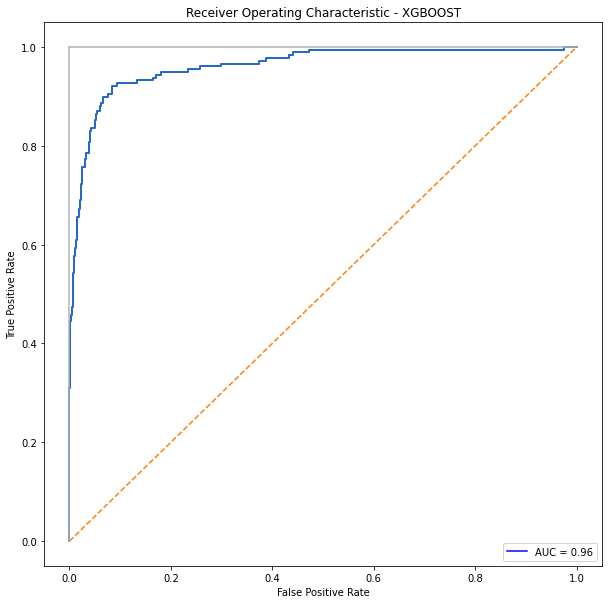

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_te, y_score1)
print('roc_auc_score for XGBOOST: ', roc_auc_score(Y_te, y_score1))
roc_auc= roc_auc_score(Y_te, y_score1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBOOST')
plt.plot(false_positive_rate1, true_positive_rate1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_te, yhat_xg3, labels=[1,0]))

[[126  51]
 [ 17 698]]


Confusion matrix, without normalization
[[126  51]
 [ 17 698]]


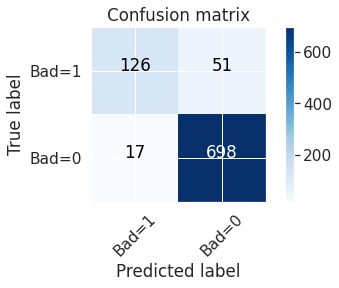

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_te, yhat_xg3, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Bad=1','Bad=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(Y_te, yhat_xg3))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       715
           1       0.88      0.71      0.79       177

    accuracy                           0.92       892
   macro avg       0.91      0.84      0.87       892
weighted avg       0.92      0.92      0.92       892



In [ ]:
df3.columns[1:19]

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Missing',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')

In [ ]:
# Important Features from the dataset

Feature: 0, Score: 0.02572
Feature: 1, Score: 0.02741
Feature: 2, Score: 0.02892
Feature: 3, Score: 0.02829
Feature: 4, Score: 0.12879
Feature: 5, Score: 0.16465
Feature: 6, Score: 0.03316
Feature: 7, Score: 0.04086
Feature: 8, Score: 0.02554
Feature: 9, Score: 0.11181
Feature: 10, Score: 0.03090
Feature: 11, Score: 0.02921
Feature: 12, Score: 0.08725
Feature: 13, Score: 0.04710
Feature: 14, Score: 0.02397
Feature: 15, Score: 0.02484
Feature: 16, Score: 0.08006
Feature: 17, Score: 0.06154


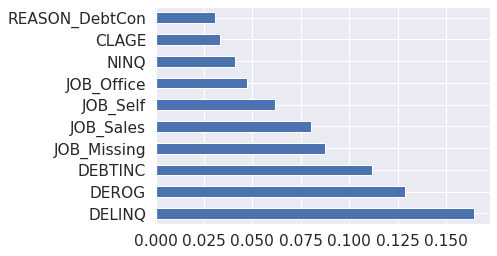

In [ ]:
# get importance
importance = pd.Series(model_xg3.feature_importances_,index=df3.columns[1:19])
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
importance.nlargest(10).plot(kind='barh')

### Gridsearchcv with random forest

In [ ]:
model_rf = RandomForestClassifier()
n_estimators = [135,140,145,150]
max_features = ['auto', 'sqrt','log2']
max_depth=[70,75,80,85,90]


param_grid = dict( n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)


grid_search3 = GridSearchCV(model_rf, param_grid, scoring="recall", n_jobs=-1, cv=10)
grid_result = grid_search3.fit(X_tr, Y_tr)

# view the complete results
print("best score:",grid_search3.best_score_)
print("best parameter:",grid_search3.best_params_)

NameError: ignored

In [ ]:
model_rf = RandomForestClassifier()
max_depth=[80, 90, 100, 110]
min_samples_leaf=[1,2,3, 4, 5]
min_samples_split=[2,4,6,8, 12]
n_estimators=[100, 150,200,250,300]


param_grid2 = dict(min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_depth=max_depth,
                   n_estimators=n_estimators)


grid_search4 = GridSearchCV(model_rf, param_grid2, scoring="recall", n_jobs=-1, cv=10)
grid_result_new = grid_search4.fit(X_tr, Y_tr)

# view the complete results
print("best score:",grid_search4.best_score_)
print("best parameter:",grid_search4.best_params_)

best score: 0.6801609657947687
best parameter: {'max_depth': 110, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
classifier_rf = RandomForestClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=80,
                                       n_estimators=145,max_features='auto',oob_score='True',n_jobs=-1,random_state=1)
classifier_rf.fit(X_tr, Y_tr)

# Predicting the Test set results
Y_predrf = classifier_rf.predict(X_te)

acc12=metrics.accuracy_score(Y_te, Y_predrf)
f1_score12=f1_score(Y_te,Y_predrf,average='macro')
jacc12=jaccard_similarity_score(Y_te, Y_predrf)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_te, Y_predrf))
print("Precision:",metrics.precision_score(Y_te, Y_predrf))
print("Recall:",metrics.recall_score(Y_te, Y_predrf))

Accuracy: 0.9260089686098655
Precision: 0.937007874015748
Recall: 0.672316384180791


In [ ]:
# Getting predicted probabilities
y_score1 = classifier_rf.predict_proba(X_te)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_te, y_score1)
print('roc_auc_score for random forest: ', roc_auc_score(Y_te, y_score1))
roc_auc= roc_auc_score(Y_te, y_score1)

roc_auc_score for random forest:  0.9684722057603413


In [ ]:
classifier_rf.predict(X_te)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

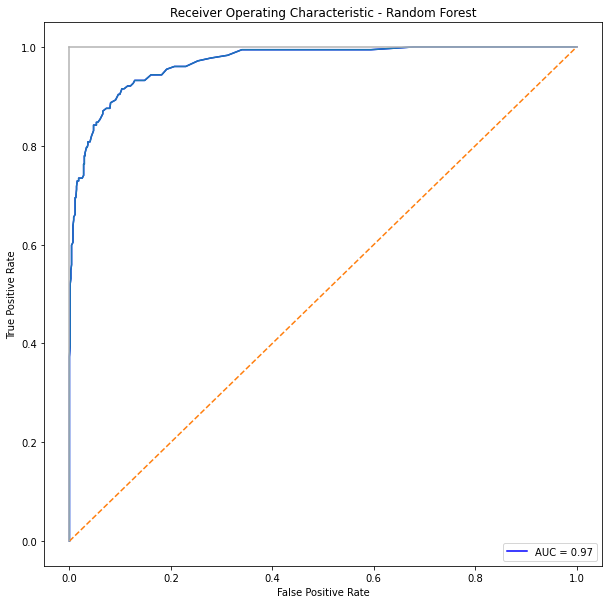

In [ ]:
# Ploting ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_tr,classifier_rf.predict(X_tr)))
print("Accuracy on test set:",metrics.accuracy_score(Y_te,Y_predrf))

Accuracy on train set: 1.0
Accuracy on test set: 0.9260089686098655


In [ ]:
print(confusion_matrix(Y_te,Y_predrf, labels=[1,0]))

[[119  58]
 [  8 707]]


Confusion matrix, without normalization
[[119  58]
 [  8 707]]


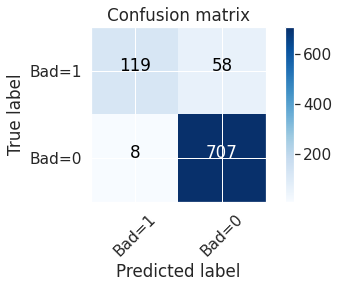

In [ ]:
# Compute confusion matrix
cnf_matrix2 = confusion_matrix(Y_te,Y_predrf, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=['Bad=1','Bad=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(Y_te, Y_predrf))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       715
           1       0.94      0.67      0.78       177

    accuracy                           0.93       892
   macro avg       0.93      0.83      0.87       892
weighted avg       0.93      0.93      0.92       892



Feature: 0, Score: 0.09135
Feature: 1, Score: 0.08559
Feature: 2, Score: 0.09826
Feature: 3, Score: 0.06554
Feature: 4, Score: 0.06158
Feature: 5, Score: 0.10773
Feature: 6, Score: 0.11350
Feature: 7, Score: 0.05914
Feature: 8, Score: 0.07967
Feature: 9, Score: 0.17077
Feature: 10, Score: 0.01021
Feature: 11, Score: 0.00964
Feature: 12, Score: 0.00138
Feature: 13, Score: 0.00894
Feature: 14, Score: 0.01340
Feature: 15, Score: 0.01055
Feature: 16, Score: 0.00802
Feature: 17, Score: 0.00475


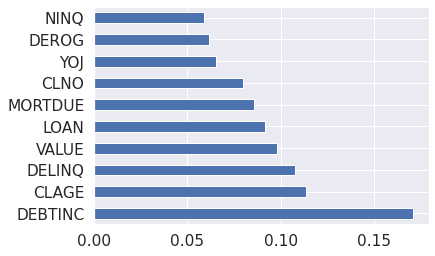

In [ ]:
# get importance
importance = pd.Series(classifier_rf.feature_importances_,index=df3.columns[1:19])
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
importance.nlargest(10).plot(kind='barh')

### Gridsearch with svm

In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid_result_svm=grid.fit(X_tr, Y_tr)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.802, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.802, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.802, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.802, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.803, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.802, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.804, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.805, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.806, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   44.5s finished


In [ ]:
# view the complete results
print("best score:",grid.best_score_)
print("best parameter:",grid.best_params_)

best score: 0.936869454906472
best parameter: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
from sklearn import svm
clf_svm = svm.SVC(C=100,gamma=0.1,kernel='rbf')
clf_svm.fit(X_tr, Y_tr)

yhat_svm = clf_svm.predict(X_te)

acc13=metrics.accuracy_score(Y_te, yhat_svm)
f1_score13=f1_score(Y_te, yhat_svm,average='macro')
jacc13=jaccard_similarity_score(Y_te, yhat_svm)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_te, yhat_svm))
print("Precision:",metrics.precision_score(Y_te, yhat_svm))
print("Recall:",metrics.recall_score(Y_te, yhat_svm))

Accuracy: 0.945067264573991
Precision: 0.9571428571428572
Recall: 0.7570621468926554


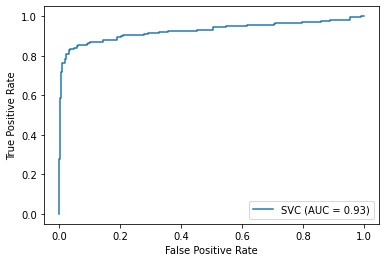

In [ ]:
metrics.plot_roc_curve(clf_svm, X_te,Y_te)  # doctest: +SKIP
plt.show()

In [ ]:
y_score1 = clf_svm.predict(X_te)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_te, y_score1)
print('roc_auc_score for SVM: ', roc_auc_score(Y_te, y_score1))
roc_auc= roc_auc_score(Y_te, y_score1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

IndexError: ignored

In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_tr,clf_svm.predict(X_tr)))
print("Accuracy on test set:",metrics.accuracy_score(Y_te,yhat_svm))

Accuracy on train set: 0.9935465768799102
Accuracy on test set: 0.945067264573991


In [ ]:
print(confusion_matrix(Y_te,yhat_svm, labels=[1,0]))

[[134  43]
 [  6 709]]


Confusion matrix, without normalization
[[134  43]
 [  6 709]]


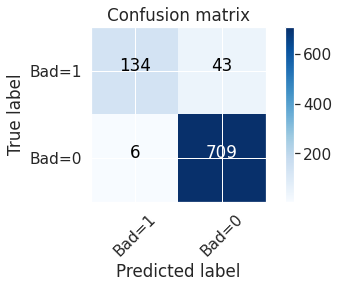

In [ ]:
# Compute confusion matrix
cnf_matrix3 = confusion_matrix(Y_te, yhat_svm, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix3, classes=['Bad=1','Bad=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(Y_te, yhat_svm))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       715
           1       0.96      0.76      0.85       177

    accuracy                           0.95       892
   macro avg       0.95      0.87      0.91       892
weighted avg       0.95      0.95      0.94       892



### GridSearch with KNN

In [ ]:
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_tr,Y_tr)
    yhat=neigh.predict(X_te)
    mean_acc[n-1] = metrics.recall_score(Y_te, yhat)


    std_acc[n-1]=np.std(yhat==Y_te)/np.sqrt(yhat.shape[0])


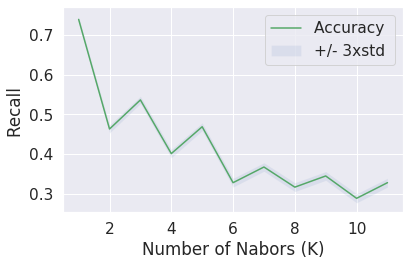

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Recall ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,15))
n_neighbors = list(range(1,12))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Use GridSearch

grid_knn = GridSearchCV(KNeighborsClassifier(),hyperparameters,scoring="recall",n_jobs=-1, cv=10)
#Fit the model
best_model = grid_knn.fit(X_tr,Y_tr)
#Print The value of best Hyperparameters
print("best score:",grid_knn.best_score_)
print("best parameter:",grid_knn.best_params_)

best score: 0.7530382293762574
best parameter: {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_4 = KNeighborsClassifier(leaf_size = 1, n_neighbors= 1, p= 1)
knn_4.fit(X_tr, Y_tr)

# Predicting the Test set results
y_pred_4 = knn_4.predict(X_te)

acc14=metrics.accuracy_score(Y_te, y_pred_4)
f1_score14=f1_score(Y_te, y_pred_4,average='macro')
jacc14=jaccard_similarity_score(Y_te, y_pred_4)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_te, y_pred_4))
print("Precision:",metrics.precision_score(Y_te, y_pred_4))
print("Recall:",metrics.recall_score(Y_te, y_pred_4))

Accuracy: 0.9461883408071748
Precision: 0.9923664122137404
Recall: 0.7344632768361582


roc_auc_score for SVM:  0.8665323377187785


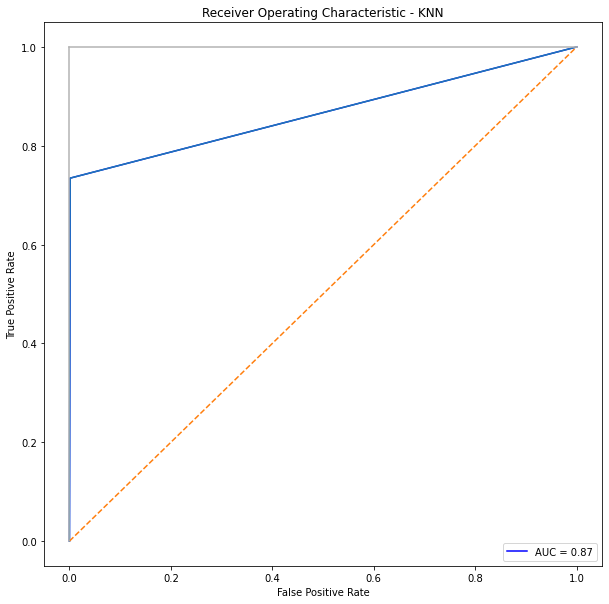

In [ ]:
y_score1 = knn_4.predict_proba(X_te)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_te, y_score1)
print('roc_auc_score for SVM: ', roc_auc_score(Y_te, y_score1))
roc_auc= roc_auc_score(Y_te, y_score1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_tr,knn_4.predict(X_tr)))
print("Accuracy on test set:",metrics.accuracy_score(Y_te,y_pred_4))

Accuracy on train set: 1.0
Accuracy on test set: 0.9461883408071748


In [ ]:
print(confusion_matrix(Y_te,y_pred_4, labels=[1,0]))

[[130  47]
 [  1 714]]


Confusion matrix, without normalization
[[130  47]
 [  1 714]]


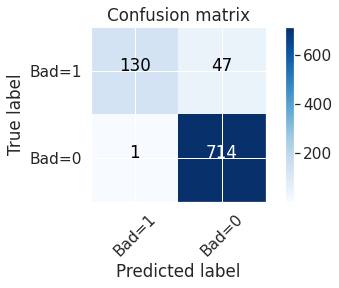

In [ ]:
# Compute confusion matrix
cnf_matrix4 = confusion_matrix(Y_te,y_pred_4, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix4, classes=['Bad=1','Bad=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(Y_te, y_pred_4))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       715
           1       0.99      0.73      0.84       177

    accuracy                           0.95       892
   macro avg       0.97      0.87      0.91       892
weighted avg       0.95      0.95      0.94       892



##  Artificial Neural Network

In [ ]:
#In our dataset, the input is of 18 values and output is of 1 values. So the input and output layer is of 18 and 1 dimensions respectively.

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Initialzing ANN
model_ann = Sequential()
#Adding Input Layer and First Hidden Layer
model_ann.add(Dense(21, input_dim=18, activation='relu'))
#Adding Second Hidden Layer
model_ann.add(Dense(19, activation='relu'))
#Adding Third Hidden Layer
model_ann.add(Dense(18,activation='relu'))
#Adding the Output Layer
model_ann.add(Dense(1, activation='sigmoid'))

In [ ]:
#Now we need to specify the loss function and the optimizer. It is done using compile function in keras.

In [ ]:
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model_ann.fit(X_tr, Y_tr, epochs=150, batch_size=64)

Epoch 1/150
56/56 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9913
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.9680
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9877
Epoch 5/150
56/56 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.9966
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9972
Epoch 7/150
56/56 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/150
56/56 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/150
56/56 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 10/150
56/56 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 11/

In [ ]:
y_pred_ann = model_ann.predict_classes(X_te)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_te, y_pred_ann))
print("Precision:",metrics.precision_score(Y_te, y_pred_ann))
print("Recall:",metrics.recall_score(Y_te, y_pred_ann))
print("f1-score",metrics.f1_score(Y_te,y_pred_ann,average='macro'))

Accuracy: 0.922645739910314
Precision: 0.8857142857142857
Recall: 0.7005649717514124
f1-score 0.8676498100159341


Confusion matrix, without normalization
[[124  53]
 [ 16 699]]


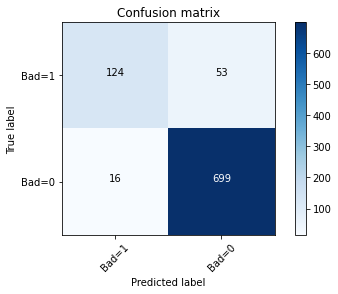

In [ ]:
# Compute confusion matrix
cnf_matrix4 = confusion_matrix(Y_te,y_pred_ann, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix4, classes=['Bad=1','Bad=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(Y_te, y_pred_ann))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       715
           1       0.89      0.70      0.78       177

    accuracy                           0.92       892
   macro avg       0.91      0.84      0.87       892
weighted avg       0.92      0.92      0.92       892



In [ ]:
print("Accuracy on training:",metrics.accuracy_score(Y_tr,model_ann.predict_classes(X_tr)))
print("Accuracy on testing:",metrics.accuracy_score(Y_te,y_pred_ann))

Accuracy on training: 1.0
Accuracy on testing: 0.922645739910314


roc_auc_score for SVM:  0.8830231914977679


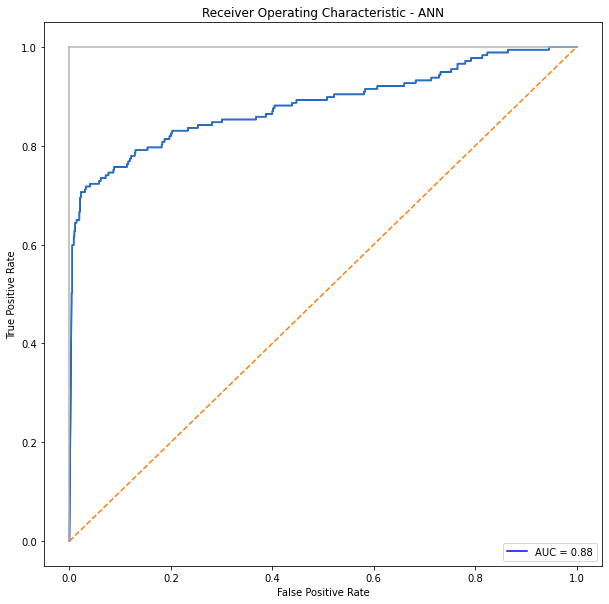

In [ ]:
y_score1 = model_ann.predict(X_te).ravel()
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_te, y_score1)
print('roc_auc_score for SVM: ', roc_auc_score(Y_te, y_score1))
roc_auc= roc_auc_score(Y_te, y_score1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - ANN')
plt.plot(false_positive_rate1, true_positive_rate1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
acc15=metrics.accuracy_score(Y_te, y_pred_ann)
f1_score15=metrics.f1_score(Y_te,y_pred_ann,average='macro')

### Report After Outliers treatment and parameter tuning

In [ ]:
new_report = pd.DataFrame({
    'Model': ['Random forest','xgboost','KNN','SVM','ANN'],
    'Otlier Treatment':['Applied','Applied','Applied','Applied','Applied'],
    'GridSearch':['Applied','Applied','Applied','Applied','Applied'],
    'Accuracy Score': [acc12,acc11,acc14,acc13,acc15],
    'F1-score' : [f1_score12,f1_score11,f1_score14,f1_score13,f1_score15]
})
new_report

,Model,Otlier Treatment,GridSearch,Accuracy Score,F1-score
0,Random forest,Applied,Applied,0.926009,0.869150
1,xgboost,Applied,Applied,0.923767,0.870526
2,KNN,Applied,Applied,0.946188,0.905818
3,SVM,Applied,Applied,0.945067,0.906012
4,ANN,Applied,Applied,0.921525,0.864043


### Our very first Report befor Outlier treatment and parameter tuning

In [ ]:
models = pd.DataFrame({
    'Model': ['Random forest','xgboost','KNN','SVM'],
    'Accuracy Score': [acc1,acc3,acc4,acc5],
    'F1-score' : [f1_score1,f1_score3,f1_score4,f1_score5]
})
models

,Model,Accuracy Score,F1-score
0,Random forest,0.926009,0.878996
1,xgboost,0.899103,0.830289
2,KNN,0.868834,0.755711
3,SVM,0.877803,0.776211


## Conclusion
### We have improved all algorithms except Random Forest it is more or less same
### Our best models are KNN and SVM ,here we have increased  both f1-score and accuracy, which is a great achivement.